<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_08/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [110]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [111]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [112]:
from sklearn.impute import SimpleImputer
#dato con variables numericas
df_num= df.drop(['clase_tipo', 'traccion_tipo', 'transmision_tipo', 'combustible_tipo', 'tamano_motor_tipo',
                 'consumo_tipo', 'co2_tipo', 'year'],axis=1)

si = SimpleImputer(strategy='mean')
si.fit(df_num)
df_num= pd.DataFrame(si.fit_transform(df_num))

df_num = df_num.rename(columns={ 0: 'desplazamiento', 1: 'cilindros', 2: 'co2' , 3: 'consumo_litros_milla'})
#normalizar los datos
scaler = MinMaxScaler()
columns = df_num.columns
df_num[columns] = scaler.fit_transform(df_num[columns])

df_num.head()

,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.243590,0.142857,0.398014,0.331027
1,0.461538,0.285714,0.527672,0.475113
2,0.243590,0.142857,0.424351,0.360294
3,0.461538,0.285714,0.527672,0.475113
4,0.410256,0.285714,0.424351,0.360294


In [113]:
df_cat= df.drop(['desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla'],axis=1)
df_cat=pd.get_dummies(df_cat)
df_cat.head()

,year,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,1984,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1984,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1985,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,1985,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1987,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


El get dummies crea columnas para las categorias y coloca un 1 si pertence y un 0 si no , de esta forma las transforma a numericas

In [114]:
#juntar los data set
df_procesado= pd.merge(df_num.reset_index(), df_cat.reset_index(), on='index', how='left')
df_procesado=df_procesado.drop(['index'],axis=1)
df_procesado

,desplazamiento,cilindros,co2,consumo_litros_milla,year,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.243590,0.142857,0.398014,0.331027,1984,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.461538,0.285714,0.527672,0.475113,1984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.243590,0.142857,0.424351,0.360294,1985,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.461538,0.285714,0.527672,0.475113,1985,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.410256,0.285714,0.424351,0.360294,1987,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.051282,0.071429,0.173307,0.083878,2015,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.038462,0.071429,0.174919,0.090196,2016,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.038462,0.071429,0.182174,0.096886,2016,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.038462,0.071429,0.176532,0.090196,2017,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

In [115]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [116]:
# etiquetar los datos con los clusters encontrados
centroids_df = pd.DataFrame(centroids, columns=list(df_procesado.columns))
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

In [117]:
#media
for i in range(0,8):
    print("Media de variables numéricas del cluster", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[4:]), axis=1).mean())

Media de variables numéricas del cluster 1
desplazamiento          0.351309
cilindros               0.278636
co2                     0.370855
consumo_litros_milla    0.301189
dtype: float64
Media de variables numéricas del cluster 2
desplazamiento          0.336339
cilindros               0.250937
co2                     0.378917
consumo_litros_milla    0.307841
dtype: float64
Media de variables numéricas del cluster 3
desplazamiento          0.369496
cilindros               0.282055
co2                     0.334626
consumo_litros_milla    0.260714
dtype: float64
Media de variables numéricas del cluster 4
desplazamiento          0.336655
cilindros               0.264392
co2                     0.365518
consumo_litros_milla    0.294735
dtype: float64
Media de variables numéricas del cluster 5
desplazamiento          0.332534
cilindros               0.262033
co2                     0.305551
consumo_litros_milla    0.229636
dtype: float64
Media de variables numéricas del cluster 6
desplaz

In [118]:
#moda
for i in range(0,8):
    print("Moda de las variables numéricas del cluster", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[4:]), axis=1).mode())

Moda de las variables numéricas del cluster 1
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.307692   0.285714  0.317749               0.24183
Moda de las variables numéricas del cluster 2
   desplazamiento  cilindros       co2  consumo_litros_milla
0         0.24359   0.142857  0.374603              0.305011
Moda de las variables numéricas del cluster 3
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.179487   0.285714  0.317749               0.24183
Moda de las variables numéricas del cluster 4
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.179487   0.285714  0.317749               0.24183
Moda de las variables numéricas del cluster 5
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.179487   0.142857  0.256333               0.24183
Moda de las variables numéricas del cluster 6
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.307692   0.142857  0.374603              0

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [119]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow

,Number of Clusters,Score
0,5,406446.977937
1,10,203282.274865
2,20,167043.307893
3,30,150319.406281
4,50,126437.016543
5,75,107701.097315
6,100,97337.301358
7,200,77388.560221
8,300,66567.143090


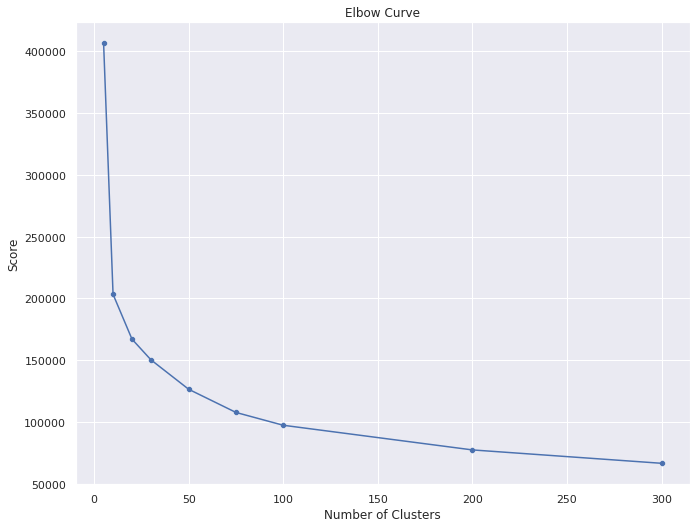

In [120]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

a partir de 100 clusters parece estabilizarse,  por lo que k=100 es una buena opción.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [121]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [123]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [124]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
iris.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
species         0.671141
dtype: float64

La varianza de petal_length es mucho mayor que las demas.

In [125]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
iris.mean(axis=0)

----------------------
Media de cada variable
----------------------


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
species         1.000000
dtype: float64

# 1. PCA


In [126]:
df_1=iris.drop(['species'],axis=1)

In [127]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_1)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [128]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_1.columns,
    index   = ['PC1', 'PC2', 'PC3','PC4']
)

,sepal_length,sepal_width,petal_length,petal_width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


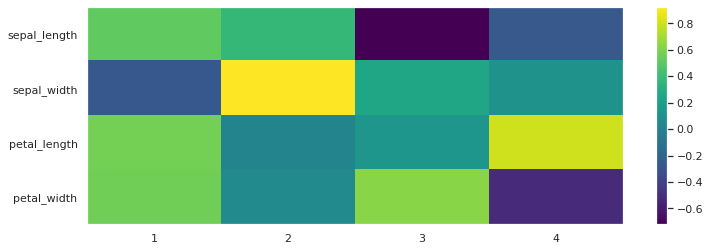

In [129]:
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_1.columns)), df_1.columns)
plt.xticks(range(len(df_1.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

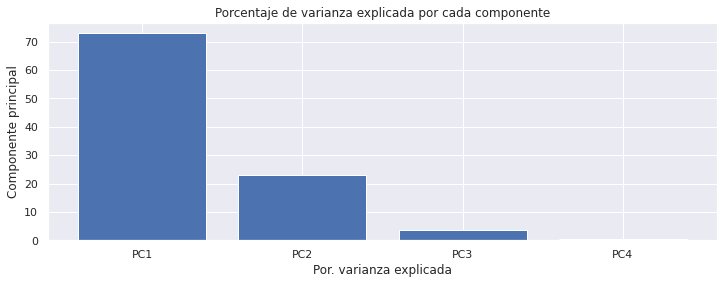

In [130]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

In [131]:
# PCA
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['species'] = y

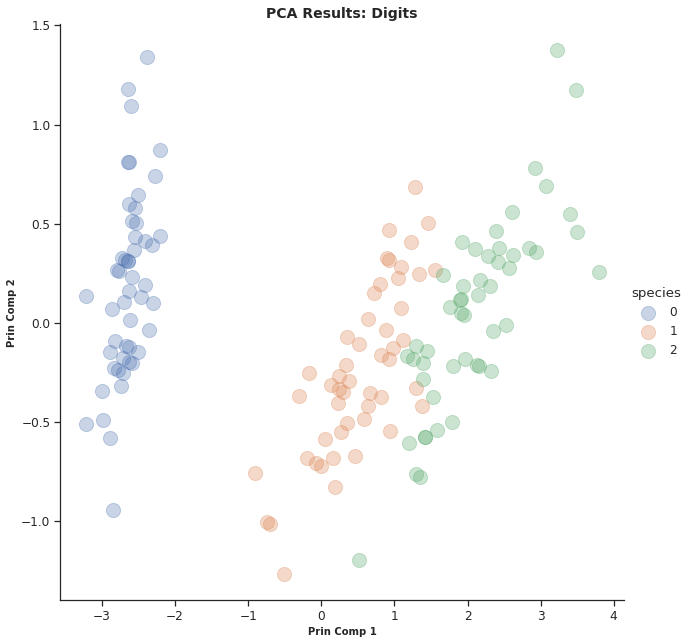

In [132]:
# Plot Digits PCA
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

# 2.TSNE

In [133]:
# tsne
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = y

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


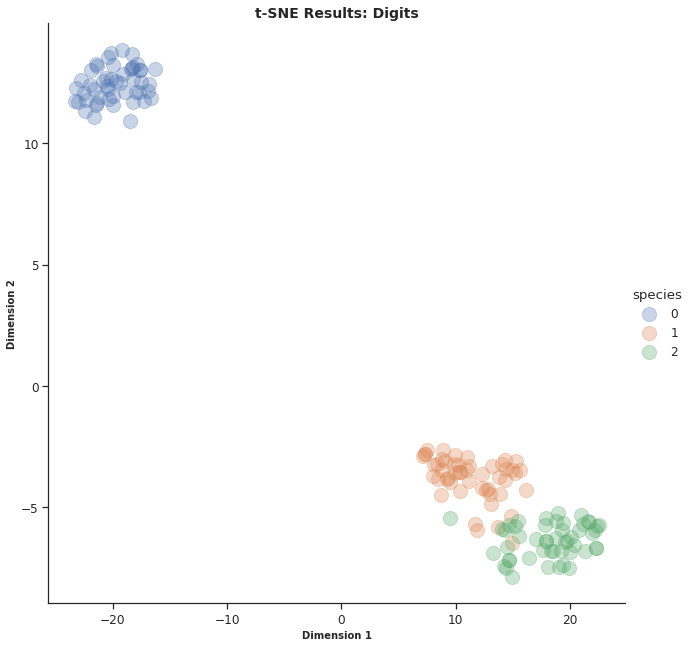

In [134]:
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

# Conclusiones:



El t-SNE funciona mejor que el PCA segun los graficos ya que se diferencian mejor las clases al estar mas agrupados los datos.